In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 1 - Random Data

In [2]:
# Let's create a simple linear model
x = np.random.normal(size=100)
y = x + np.random.normal(size=100)
# Reshaping the 'x' variable so to use it in the prediction model
x = x.reshape((-1, 1))

In [3]:
x.shape

(100, 1)

In [4]:
y.shape

(100,)

In [5]:
m = LinearRegression().fit(x, y)
yhat = m.predict(x)
print(f'RMSE on this basic data: {np.sqrt(np.mean((y - yhat)**2))}')

RMSE on this basic data: 1.0651417345373733


Now let's do a training-test split with 30% of the data for the validation part.

In [6]:
y_train, y_valid, x_train, x_valid = train_test_split(y, x, test_size=0.3)

In [7]:
y_train.shape

(70,)

In [8]:
y_valid.shape

(30,)

In [9]:
x_train.shape

(70, 1)

In [10]:
x_valid.shape

(30, 1)

In [11]:
m = LinearRegression().fit(x_train, y_train)

# Prediction using training data
y_hat_train = m.predict(x_train)
print(f'RMSE on x_train data: {np.sqrt(np.mean((y_train - y_hat_train)**2))}')

# Prediction using validation data
y_hat_valid = m.predict(x_valid)
print(f'RMSE on x_valid data: {np.sqrt(np.mean((y_valid - y_hat_valid)**2))}')

# The validation data RMSE is the benchmark, so let's store it.
RMSE_b = np.sqrt(np.mean((y_valid - y_hat_valid)**2))

RMSE on x_train data: 1.0944455711325562
RMSE on x_valid data: 1.0031459446749897


#### Let's overfit this now

In [12]:
# Creating some irrelevant data
z1 = x**2
# Stacking it
X = np.hstack((x, z1))
m = LinearRegression().fit(X, y)

# Whole sample 
yhat = m.predict(X)
print(f'RMSE on this basic data: {np.sqrt(np.mean((y - yhat)**2))}')

# Training and validation samples
y_train, y_valid, X_train, X_valid = train_test_split(y, X, test_size=0.1)

# Prediction using training data
y_hat_train = m.predict(X_train)
print(f'RMSE on x_train data: {np.sqrt(np.mean((y_train - y_hat_train)**2))}')

# Prediction using validation data
y_hat_valid = m.predict(X_valid)
print(f'RMSE on x_valid data: {np.sqrt(np.mean((y_valid - y_hat_valid)**2))}')

RMSE on this basic data: 1.0592319044486689
RMSE on x_train data: 0.9999745935135846
RMSE on x_valid data: 1.4900267061249648


Text(0.5, 1.0, 'Validation data')

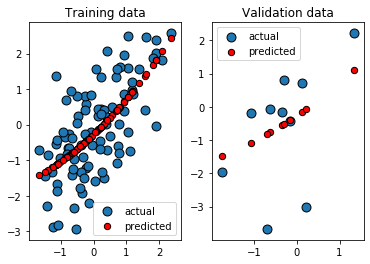

In [13]:
# Actual x Predicted graphs for training and validation data
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,0], y_train, s=80, edgecolors='k', label='actual')
yhatTrain = m.predict(X_train)
plt.scatter(X_train[:,0], y_hat_train, c='r', s=40, edgecolors='k', label='predicted')
plt.legend()
plt.title("Training data")

plt.subplot(1, 2, 2)
plt.scatter(X_valid[:,0], y_valid, s=80, edgecolors='k', label='actual')
yhatValid = m.predict(X_valid)
plt.scatter(X_valid[:,0], y_hat_valid, c='r', s=40, edgecolors='k', label='predicted')
plt.legend()
plt.title("Validation data")

Now let's do the same with more random variables

In [14]:
z2 = x**4
z3 = x*182126/47
z4 = np.cos(x)
X = np.hstack((x, z1, z2, z3, z4))
m = LinearRegression().fit(X, y)

# Whole sample 
yhat = m.predict(X)
print(f'RMSE on this basic data: {np.sqrt(np.mean((y - yhat)**2))}')

# Training and validation samples
y_train, y_valid, X_train, X_valid = train_test_split(y, X, test_size=0.1)

# Prediction using training data
y_hat_train = m.predict(X_train)
print(f'RMSE on x_train data: {np.sqrt(np.mean((y_train - y_hat_train)**2))}')

# Prediction using validation data
y_hat_valid = m.predict(X_valid)
print(f'RMSE on x_valid data: {np.sqrt(np.mean((y_valid - y_hat_valid)**2))}')

RMSE on this basic data: 1.055361832593552
RMSE on x_train data: 1.0719910918552444
RMSE on x_valid data: 0.8918530528059051


Text(0.5, 1.0, 'Validation data')

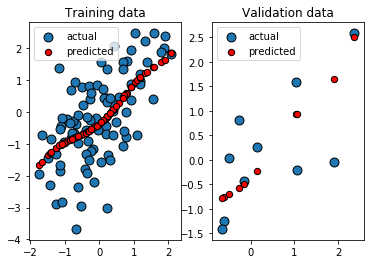

In [15]:
# Actual x Predicted graphs for training and validation data
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,0], y_train, s=80, edgecolors='k', label='actual')
plt.scatter(X_train[:,0], y_hat_train, c='r', s=40, edgecolors='k', label='predicted')
plt.legend()
plt.title("Training data")

plt.subplot(1, 2, 2)
plt.scatter(X_valid[:,0], y_valid, s=80, edgecolors='k', label='actual')
plt.scatter(X_valid[:,0], y_hat_valid, c='r', s=40, edgecolors='k', label='predicted')
plt.legend()
plt.title("Validation data")

We can see the overfitting effect above. In the plot for training data, look at how the curve is not very linear but, instead, it adapts itself to the data.

Now let's replace the random 'z' variables with some random 'r' data

In [16]:
r1 = np.random.normal(size=100)
r2 = np.random.uniform(size=100)
r3 = np.random.normal(size=100)

In [17]:
X = np.hstack((x.reshape((-1, 1)),
             r1.reshape((-1, 1)),
             r2.reshape((-1, 1)),
             r3.reshape((-1, 1))
    ))
m = LinearRegression().fit(X, y)

# Whole sample 
yhat = m.predict(X)
print(f'RMSE on this basic data: {np.sqrt(np.mean((y - yhat)**2))}')

# Training and validation samples
y_train, y_valid, X_train, X_valid = train_test_split(y, X, test_size=0.1)

# Prediction using training data
y_hat_train = m.predict(X_train)
print(f'RMSE on x_train data: {np.sqrt(np.mean((y_train - y_hat_train)**2))}')

# Prediction using validation data
y_hat_valid = m.predict(X_valid)
print(f'RMSE on x_valid data: {np.sqrt(np.mean((y_valid - y_hat_valid)**2))}')

RMSE on this basic data: 1.0476995761031853
RMSE on x_train data: 1.0165929439677002
RMSE on x_valid data: 1.294447022532673


Text(0.5, 1.0, 'Validation data')

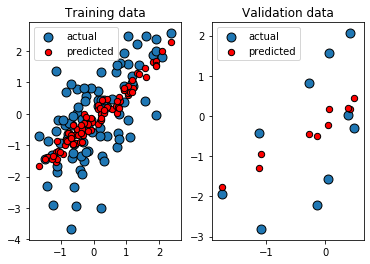

In [18]:
# Actual x Predicted graphs for training and validation data
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,0], y_train, s=80, edgecolors='k', label='actual')
plt.scatter(X_train[:,0], y_hat_train, c='r', s=40, edgecolors='k', label='predicted')
plt.legend()
plt.title("Training data")

plt.subplot(1, 2, 2)
plt.scatter(X_valid[:,0], y_valid, s=80, edgecolors='k', label='actual')
plt.scatter(X_valid[:,0], y_hat_valid, c='r', s=40, edgecolors='k', label='predicted')
plt.legend()
plt.title("Validation data")

We can see that, because our data is mostly uniform and/or normal, the RMSE scores were basically **the same**, no matter if we chose to use the entire data or split it into training and validation ones. This made overfitting a bit more complicated to identify, if there is any.

### 2 - Boston Data

In [19]:
boston = pd.read_csv("./Downloads/boston.csv.bz2", sep='\t')
boston.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
238,0.08244,30.0,4.93,0,0.428,6.481,18.5,6.1899,6,300,16.6,379.41,6.36,23.7
317,0.24522,0.0,9.90,0,0.544,5.782,71.7,4.0317,4,304,18.4,396.90,15.94,19.8
347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
243,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30,19.2


Initially, let's just use a sample of our data.

In [20]:
boston = boston.sample(100)

Let's do the test/train split in the Boston data and calculate the RMSE for both data.

In [21]:
y = boston.medv
X0 = boston.drop('medv', axis=1)

# 30% of the data will be used for testing. So 70% will be used for training
y_train, y_valid, X_train, X_valid = train_test_split(y, X0, test_size=0.3)
m = LinearRegression().fit(X_train, y_train)

# Prediction using training data
y_hat_train = m.predict(X_train)
print(f'RMSE on X_train data: {np.sqrt(np.mean((y_train - y_hat_train)**2))}')

# Prediction using validation data
y_hat_valid = m.predict(X_valid)
print(f'RMSE on X_valid data: {np.sqrt(np.mean((y_valid - y_hat_valid)**2))}')

RMSE on X_train data: 4.040052025534729
RMSE on X_valid data: 4.594858310077801


Now let's add some random variables to our data and see how it affects the results of our prediction model.

In [22]:
X0.shape[0]

100

In [23]:
z1 = boston.indus**4
z2 = boston.age*182126/47
z3 = np.cos(boston.tax)
z4 = boston.zn + boston.crim

y = boston.medv
X0 = boston.drop('medv', axis=1)

# Adding these new variables to our data frame
X0['z1'] = z1
X0['z2'] = z2
X0['z3'] = z3
X0['z4'] = z4

# 30% of the data will be used for testing. So 70% will be used for training
y_train, y_valid, X_train, X_valid = train_test_split(y, X0, test_size=0.3)
m = LinearRegression().fit(X_train, y_train)

# Prediction using training data
y_hat_train = m.predict(X_train)
print(f'RMSE on X_train data: {np.sqrt(np.mean((y_train - y_hat_train)**2))}')

# Prediction using validation data
y_hat_valid = m.predict(X_valid)
print(f'RMSE on X_valid data: {np.sqrt(np.mean((y_valid - y_hat_valid)**2))}')

RMSE on X_train data: 3.5463909095839043
RMSE on X_valid data: 6.7803995661982075


In [24]:
print('My first time running the cell above game ve me an RMSE of 3.82 for _train and of 5.28 for X_valid')

My first time running the cell above game ve me an RMSE of 3.82 for _train and of 5.28 for X_valid


Now, same calculations but with the entire sample.

In [25]:
boston = pd.read_csv("./Downloads/boston.csv.bz2", sep='\t')
y = boston.medv
X0 = boston.drop('medv', axis=1)

# 30% of the data will be used for testing. So 70% will be used for training
y_train, y_valid, X_train, X_valid = train_test_split(y, X0, test_size=0.3)
m = LinearRegression().fit(X_train, y_train)

# Prediction using training data
y_hat_train = m.predict(X_train)
print(f'RMSE on X_train data: {np.sqrt(np.mean((y_train - y_hat_train)**2))}')

# Prediction using validation data
y_hat_valid = m.predict(X_valid)
print(f'RMSE on X_valid data: {np.sqrt(np.mean((y_valid - y_hat_valid)**2))}')

RMSE on X_train data: 4.546864496528843
RMSE on X_valid data: 5.042965366774651


In [26]:
z1 = boston.indus**4
z2 = boston.age*182126/47
z3 = np.cos(boston.tax)
z4 = boston.zn + boston.crim

y = boston.medv
X0 = boston.drop('medv', axis=1)

# Adding these new variables to our data frame
X0['z1'] = z1
X0['z2'] = z2
X0['z3'] = z3
X0['z4'] = z4

# 30% of the data will be used for testing. So 70% will be used for training
y_train, y_valid, X_train, X_valid = train_test_split(y, X0, test_size=0.3)
m = LinearRegression().fit(X_train, y_train)

# Prediction using training data
y_hat_train = m.predict(X_train)
print(f'RMSE on X_train data: {np.sqrt(np.mean((y_train - y_hat_train)**2))}')

# Prediction using validation data
y_hat_valid = m.predict(X_valid)
print(f'RMSE on X_valid data: {np.sqrt(np.mean((y_valid - y_hat_valid)**2))}')

RMSE on X_train data: 4.683152527453882
RMSE on X_valid data: 4.655373403712233


We can see that the error in the validation data increased, as our training data potentially underfit due to adding some random variables. However, the **increase in sample size reduced overfitting**. Therefore, more data (rows) is better for our prediction model.